In [2]:
import pandas as pd

# Load the dataset
file_path = "./BIKE DETAILS.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


(None,
                                   name  selling_price  year seller_type  \
 0            Royal Enfield Classic 350         175000  2019  Individual   
 1                            Honda Dio          45000  2017  Individual   
 2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
 3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
 4                Yamaha SZ [2013-2014]          20000  2011  Individual   
 
        owner  km_driven  ex_showroom_price  
 0  1st owner        350                NaN  
 1  1st owner       5650                NaN  
 2  1st owner      12000           148114.0  
 3  1st owner      23000            89643.0  
 4  2nd owner      21000                NaN  )

In [3]:
# 1. Range of selling prices
selling_price_range = (df["selling_price"].min(), df["selling_price"].max())

# 2. Median selling price
median_selling_price = df["selling_price"].median()

# 3. Most common seller type
most_common_seller = df["seller_type"].mode()[0]

# 4. Number of bikes driven more than 50,000 km
bikes_above_50k_km = (df["km_driven"] > 50000).sum()

# 5. Average km_driven for each ownership type
avg_km_per_owner = df.groupby("owner")["km_driven"].mean()

# 6. Proportion of bikes from 2015 or older
bikes_2015_or_older = (df["year"] <= 2015).sum() / len(df)

# 7. Missing value trend
missing_values = df.isnull().sum()

# 8. Highest ex_showroom_price and corresponding bike name
max_ex_showroom_price = df["ex_showroom_price"].max()
bike_with_max_ex_showroom_price = df.loc[df["ex_showroom_price"].idxmax(), "name"]

# 9. Total number of bikes listed by each seller type
bikes_per_seller_type = df["seller_type"].value_counts()

# Return results
(
    selling_price_range,
    median_selling_price,
    most_common_seller,
    bikes_above_50k_km,
    avg_km_per_owner,
    bikes_2015_or_older,
    missing_values,
    (max_ex_showroom_price, bike_with_max_ex_showroom_price),
    bikes_per_seller_type
)


((5000, 760000),
 45000.0,
 'Individual',
 170,
 owner
 1st owner     32816.583333
 2nd owner     39288.991870
 3rd owner     33292.181818
 4th owner    311500.000000
 Name: km_driven, dtype: float64,
 0.5664467483506126,
 name                   0
 selling_price          0
 year                   0
 seller_type            0
 owner                  0
 km_driven              0
 ex_showroom_price    435
 dtype: int64,
 (1278000.0, 'Harley-Davidson Street Bob'),
 seller_type
 Individual    1055
 Dealer           6
 Name: count, dtype: int64)

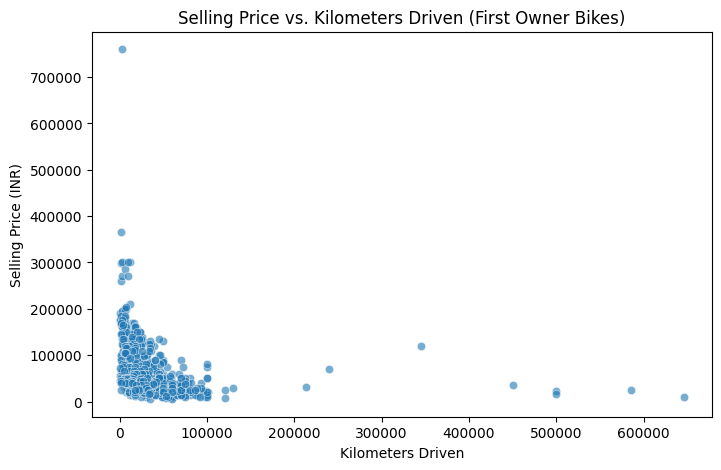

In [5]:
# What is the relationship between selling_price and km_driven for first-owner bikes
import seaborn as sns
import matplotlib.pyplot as plt
# Filter first-owner bikes
first_owner_bikes = df[df["owner"] == "1st owner"]

# Scatter plot of selling_price vs. km_driven for first-owner bikes
plt.figure(figsize=(8,5))
sns.scatterplot(data=first_owner_bikes, x="km_driven", y="selling_price", alpha=0.6)
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price (INR)")
plt.title("Selling Price vs. Kilometers Driven (First Owner Bikes)")
plt.show()


In [6]:
# Identify and remove outliers in the km_driven column using the IQR method# Compute IQR for km_driven
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]

# Count of removed outliers
outliers_removed = df.shape[0] - df_no_outliers.shape[0]

outliers_removed


39

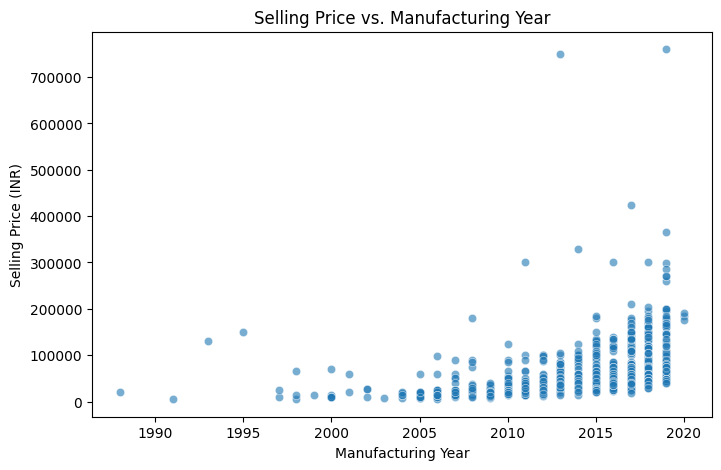

In [11]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price
# Scatter plot of year vs. selling_price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="year", y="selling_price", alpha=0.6)
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price (INR)")
plt.title("Selling Price vs. Manufacturing Year")
plt.show()


In [16]:
 # What is the average depreciation in selling price based on the bike's age (current year - manufacturing 
# year)
# Current year assumption
current_year = 2025

# Calculate bike age
df["bike_age"] = current_year - df["year"]

# Compute average depreciation per year
avg_depreciation = df.groupby("bike_age")["selling_price"].mean().diff()

avg_depreciation


bike_age
5               NaN
6     -63643.821705
7     -32029.137582
8      -8765.637204
9     -20425.718151
10     -1969.018692
11     -7831.868132
12      2468.854433
13    -15388.586301
14       -92.678689
15     -3862.387978
16     -9525.476190
17     12021.428571
18     -9361.699507
19     -1547.586207
20     -6401.428571
21     -1878.571429
22     -7100.000000
23     12666.666667
24     19333.333333
25    -19166.666667
26     -5833.333333
27     13333.333333
28    -10833.333333
30    132500.000000
32    -20000.000000
34   -124000.000000
37     14000.000000
Name: selling_price, dtype: float64

In [17]:
# Which bike names are priced significantly above the average price for their manufacturing year
# Calculate average price per manufacturing year
avg_price_per_year = df.groupby("year")["selling_price"].mean()

# Identify bikes priced significantly above average for their year (threshold: 1.5x above mean)
threshold_multiplier = 1.5
above_avg_bikes = df[df.apply(lambda row: row["selling_price"] > threshold_multiplier * avg_price_per_year[row["year"]], axis=1)]

# Extract relevant columns
above_avg_bikes[["name", "year", "selling_price"]]


,name,year,selling_price
2,Royal Enfield Classic Gunmetal Grey,2018,150000
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
18,Royal Enfield Classic Gunmetal Grey,2018,150000
23,Jawa Standard,2019,180000
...,...,...,...
979,Royal Enfield Thunder 500,2015,105000
981,Royal Enfield Thunder 350,2013,105000
983,Royal Enfield Classic 350,2015,100000
984,Royal Enfield Classic 500,2014,95000


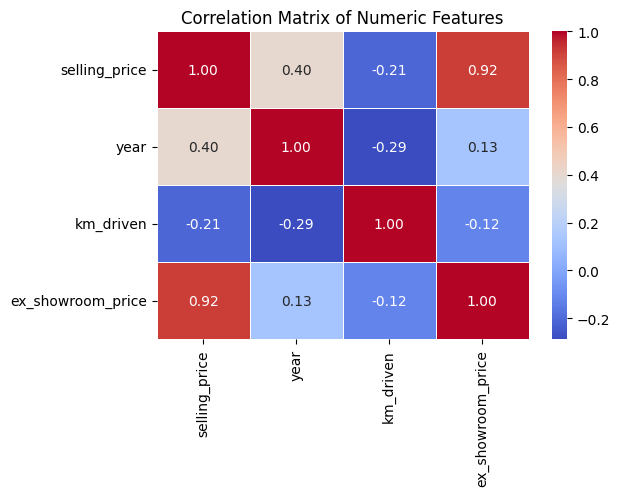

In [18]:
# Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import numpy as np

# Compute correlation matrix for numeric columns
corr_matrix = df[["selling_price", "year", "km_driven", "ex_showroom_price"]].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [19]:
# 2ND DATASET

In [20]:
# Load the car sale dataset
car_file_path = "./Car Sale.csv"
car_df = pd.read_csv(car_file_path)

# Display basic information about the dataset
car_df.info(), car_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


(None,
          Car_id      Date Customer Name Gender  Annual Income  \
 0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
 1  C_CND_000002  1/2/2022           Gia   Male        1480000   
 2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
 3  C_CND_000004  1/2/2022       Giselle   Male          13500   
 4  C_CND_000005  1/2/2022         Grace   Male        1465000   
 
                            Dealer_Name   Company       Model  \
 0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
 1                     C & M Motors Inc     Dodge     Durango   
 2                          Capitol KIA  Cadillac    Eldorado   
 3               Chrysler of Tri-Cities    Toyota      Celica   
 4                    Chrysler Plymouth     Acura          TL   
 
                       Engine Transmission       Color  Price ($)  Dealer_No   \
 0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
 1  DoubleÂ Overhead Camshaft         Aut

In [21]:
# 1. Average Selling Price of Cars for Each Dealer
# Average selling price per dealer
avg_price_per_dealer = car_df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)

# Display top 10 dealers with highest average prices
avg_price_per_dealer.head(10)


Dealer_Name
U-Haul CO                            28769.919006
Classic Chevy                        28602.014446
Rabun Used Car Sales                 28527.536177
Iceberg Rentals                      28522.958533
Enterprise Rent A Car                28312.580800
Scrivener Performance Engineering    28297.371589
Gartner Buick Hyundai Saab           28247.621019
Saab-Belle Dodge                     28190.139888
Capitol KIA                          28189.703822
Race Car Help                        28163.372706
Name: Price ($), dtype: float64

In [23]:
# Which car brand (Company) has the highest variation in prices?
price_variation_by_brand = car_df.groupby("Company")["Price ($)"].std().sort_values(ascending=False)
price_variation_by_brand.head(5)  # Display top 5 brands with highest price variation


Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64

C:\Users\Sumit\AppData\Local\Temp\ipykernel_2676\3992666163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_df, x="Transmission", y="Price ($)", showfliers=False, palette="coolwarm")


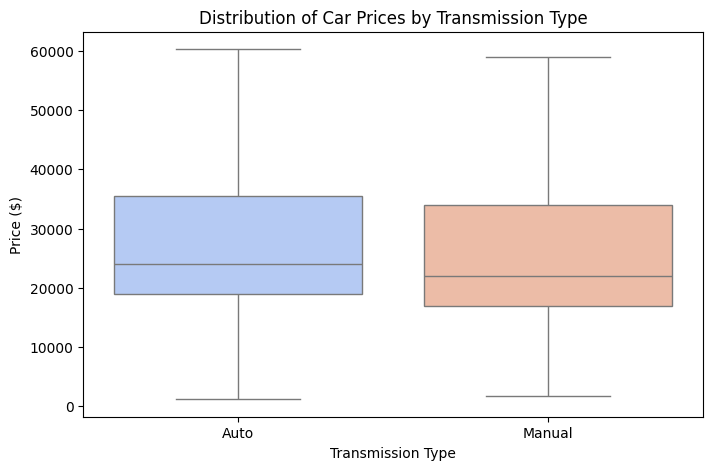

In [24]:
# What is the distribution of car prices for each transmission type?¶
plt.figure(figsize=(8,5))
sns.boxplot(data=car_df, x="Transmission", y="Price ($)", showfliers=False, palette="coolwarm")
plt.xlabel("Transmission Type")
plt.ylabel("Price ($)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()


C:\Users\Sumit\AppData\Local\Temp\ipykernel_2676\2165489609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_df, x="Dealer_Region", y="Price ($)", showfliers=False, palette="viridis")


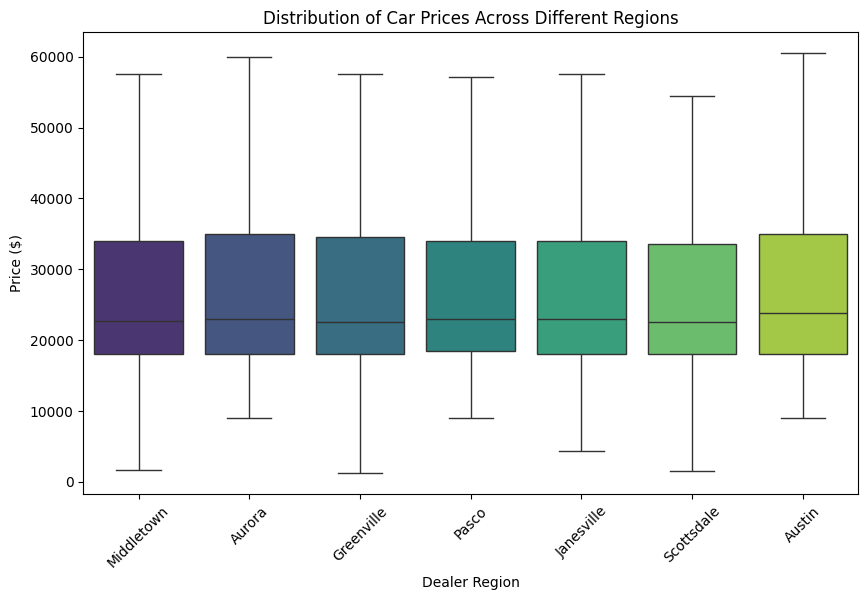

In [25]:
# What is the distribution of car prices across different regions?
plt.figure(figsize=(10,6))
sns.boxplot(data=car_df, x="Dealer_Region", y="Price ($)", showfliers=False, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Dealer Region")
plt.ylabel("Price ($)")
plt.title("Distribution of Car Prices Across Different Regions")
plt.show()


C:\Users\Sumit\AppData\Local\Temp\ipykernel_2676\551640365.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_df, y="Body Style", order=car_df["Body Style"].value_counts().index, palette="pastel")


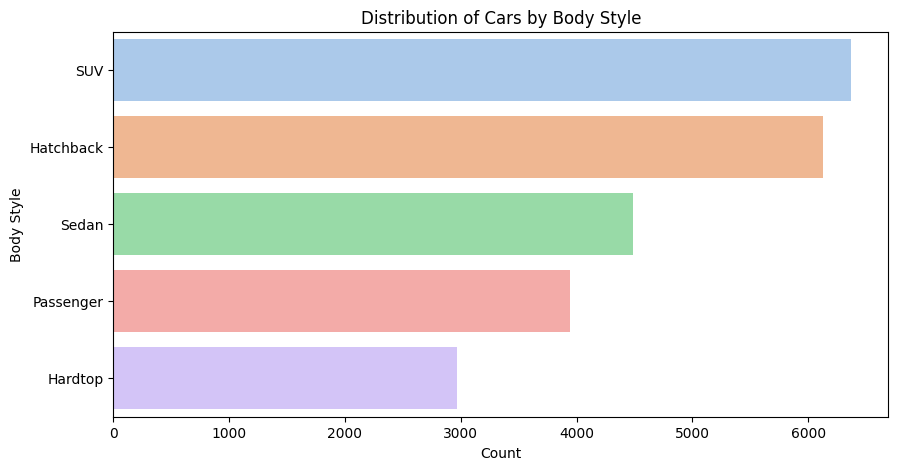

In [26]:
# What is the distribution of cars based on body styles?
plt.figure(figsize=(10,5))
sns.countplot(data=car_df, y="Body Style", order=car_df["Body Style"].value_counts().index, palette="pastel")
plt.xlabel("Count")
plt.ylabel("Body Style")
plt.title("Distribution of Cars by Body Style")
plt.show()


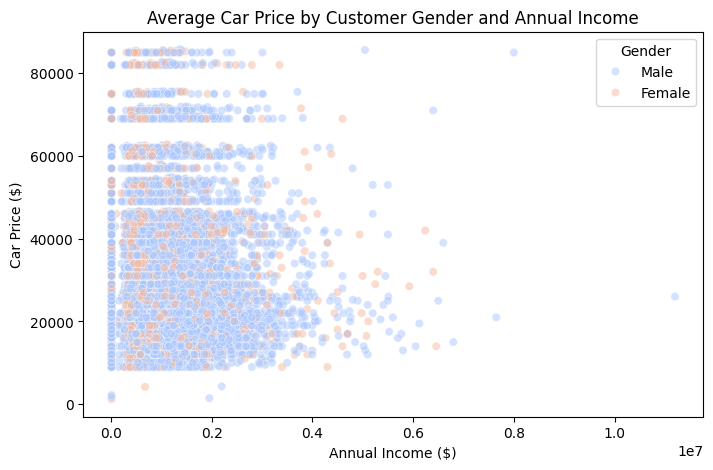

Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64

In [27]:
# How does the average selling price of cars vary by customer gender and annual income?
avg_price_by_gender = car_df.groupby("Gender")["Price ($)"].mean()

plt.figure(figsize=(8,5))
sns.scatterplot(data=car_df, x="Annual Income", y="Price ($)", hue="Gender", alpha=0.5, palette="coolwarm")
plt.xlabel("Annual Income ($)")
plt.ylabel("Car Price ($)")
plt.title("Average Car Price by Customer Gender and Annual Income")
plt.legend(title="Gender")
plt.show()

avg_price_by_gender  # Display average price by gender


C:\Users\Sumit\AppData\Local\Temp\ipykernel_2676\3544390478.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


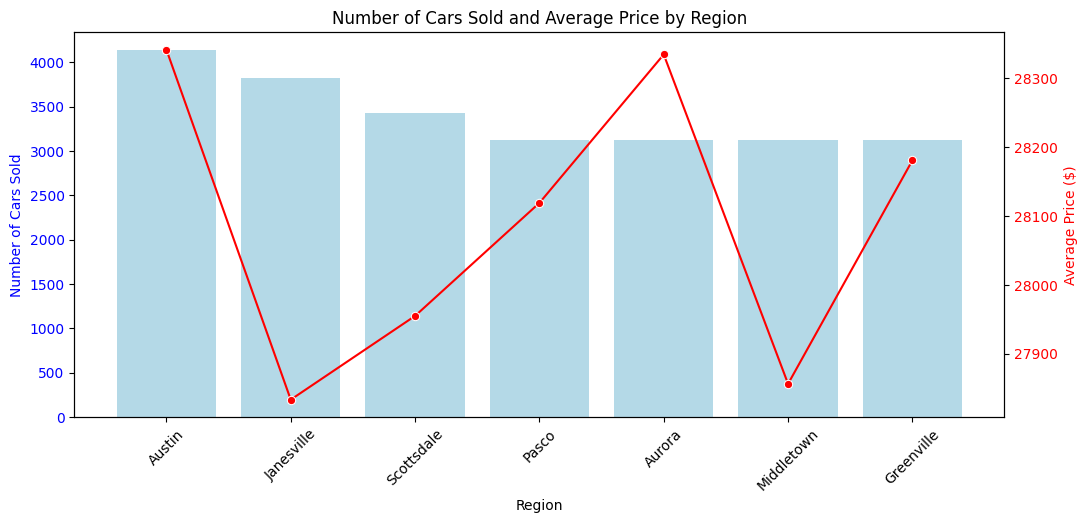

In [28]:
# What is the distribution of car prices by region, and how does the number of cars sold vary by region?
car_sales_by_region = car_df["Dealer_Region"].value_counts()
avg_price_by_region = car_df.groupby("Dealer_Region")["Price ($)"].mean()

fig, ax1 = plt.subplots(figsize=(12,5))
sns.barplot(x=car_sales_by_region.index, y=car_sales_by_region.values, ax=ax1, color='skyblue', alpha=0.7)
ax1.set_ylabel('Number of Cars Sold', color='blue')
ax1.set_xlabel('Region')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2 = ax1.twinx()
sns.lineplot(x=avg_price_by_region.index, y=avg_price_by_region.values, ax=ax2, color='red', marker="o")
ax2.set_ylabel('Average Price ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Number of Cars Sold and Average Price by Region')
plt.show()


C:\Users\Sumit\AppData\Local\Temp\ipykernel_2676\2354703300.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette="viridis")


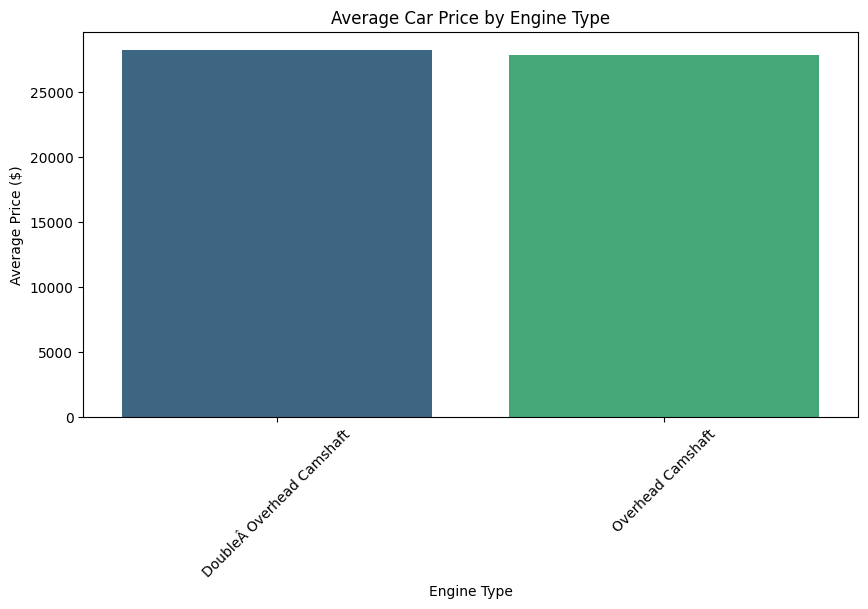

In [29]:
# How does the average car price differ between cars with different engine sizes?
avg_price_by_engine = car_df.groupby("Engine")["Price ($)"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Engine Type")
plt.ylabel("Average Price ($)")
plt.title("Average Car Price by Engine Type")
plt.show()


C:\Users\Sumit\AppData\Local\Temp\ipykernel_2676\1833446330.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_5_models_df, x="Model", y="Price ($)", showfliers=False, palette="pastel")


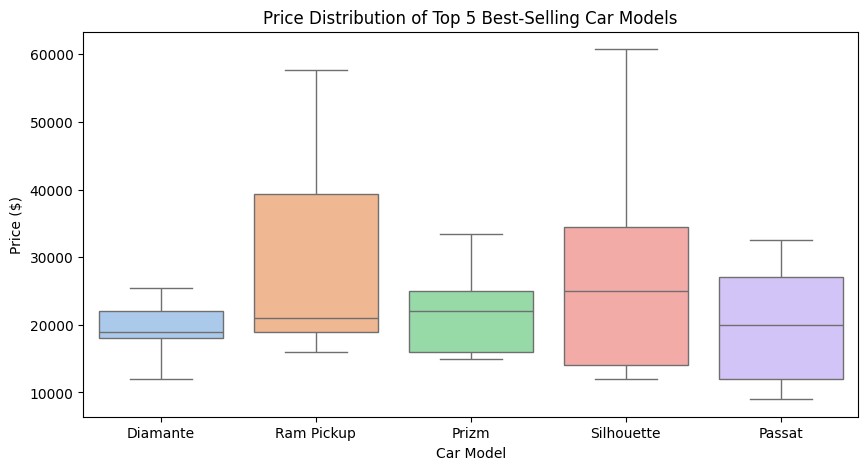

In [30]:
# What are the top 5 car models with the highest number of sales?
top_5_models = car_df["Model"].value_counts().head(5).index
top_5_models_df = car_df[car_df["Model"].isin(top_5_models)]

plt.figure(figsize=(10,5))
sns.boxplot(data=top_5_models_df, x="Model", y="Price ($)", showfliers=False, palette="pastel")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.show()


C:\Users\Sumit\AppData\Local\Temp\ipykernel_2676\2598507611.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_5_models_df, x="Model", y="Price ($)", showfliers=False, palette="pastel")


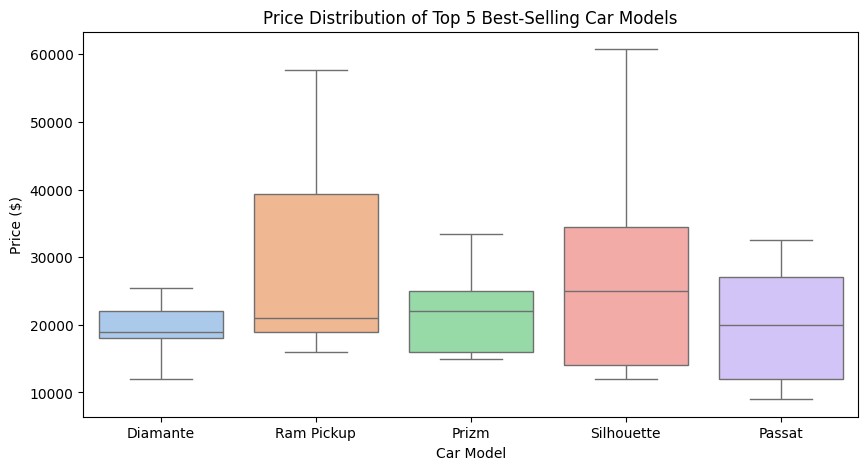

In [31]:
# Top 5 car models with the highest number of sales & price distribution
top_5_models = car_df["Model"].value_counts().head(5).index
top_5_models_df = car_df[car_df["Model"].isin(top_5_models)]

plt.figure(figsize=(10,5))
sns.boxplot(data=top_5_models_df, x="Model", y="Price ($)", showfliers=False, palette="pastel")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.show()

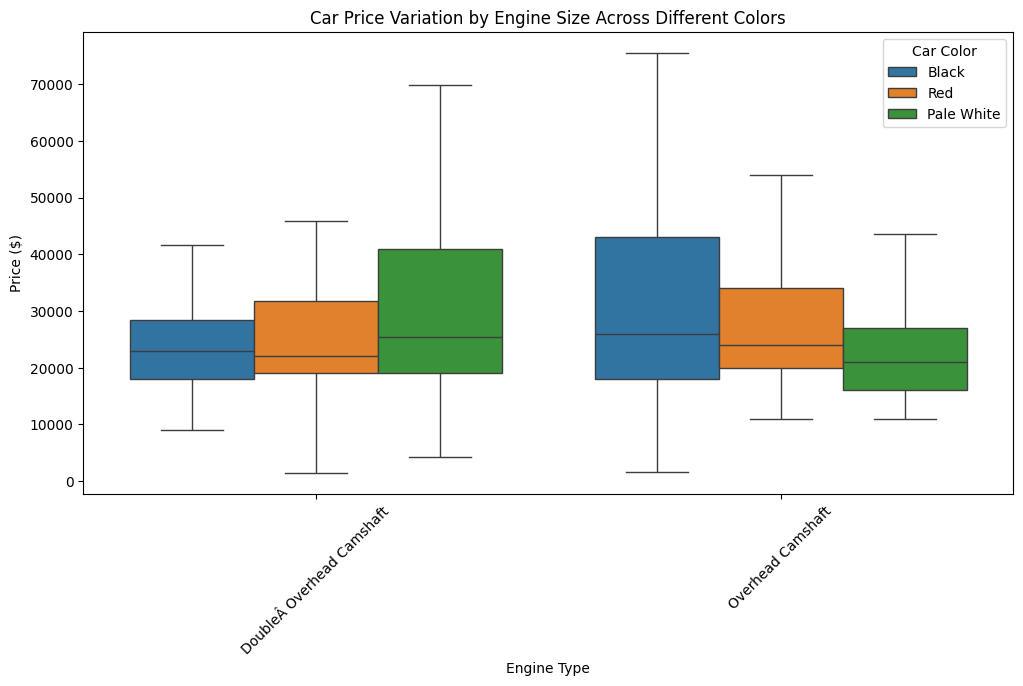

In [32]:
 # Car price variation with engine size across different car colors
plt.figure(figsize=(12,6))
sns.boxplot(data=car_df, x="Engine", y="Price ($)", hue="Color", showfliers=False, palette="tab10")
plt.xticks(rotation=45)
plt.xlabel("Engine Type")
plt.ylabel("Price ($)")
plt.title("Car Price Variation by Engine Size Across Different Colors")
plt.legend(title="Car Color", bbox_to_anchor=(1,1))
plt.show()


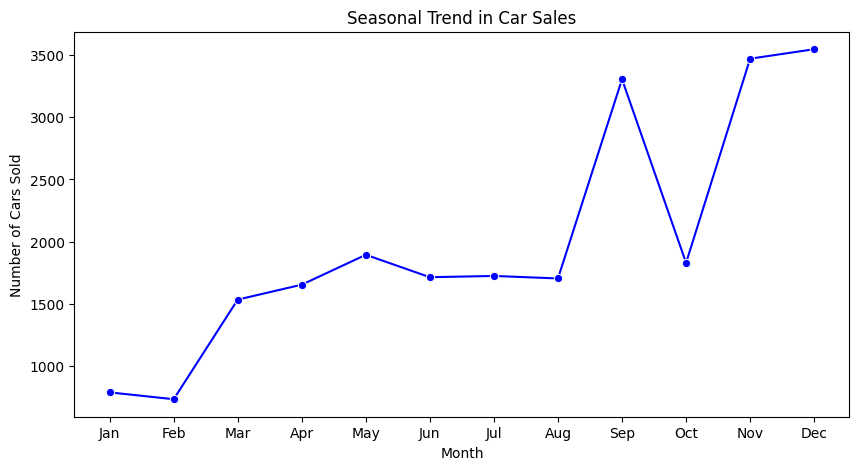

In [33]:
# Seasonal trend in car sales based on the date of sale
car_df["Date"] = pd.to_datetime(car_df["Date"])  # Convert date column to datetime
car_df["Month"] = car_df["Date"].dt.month  # Extract month

monthly_sales = car_df["Month"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="blue")
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Seasonal Trend in Car Sales")
plt.show()

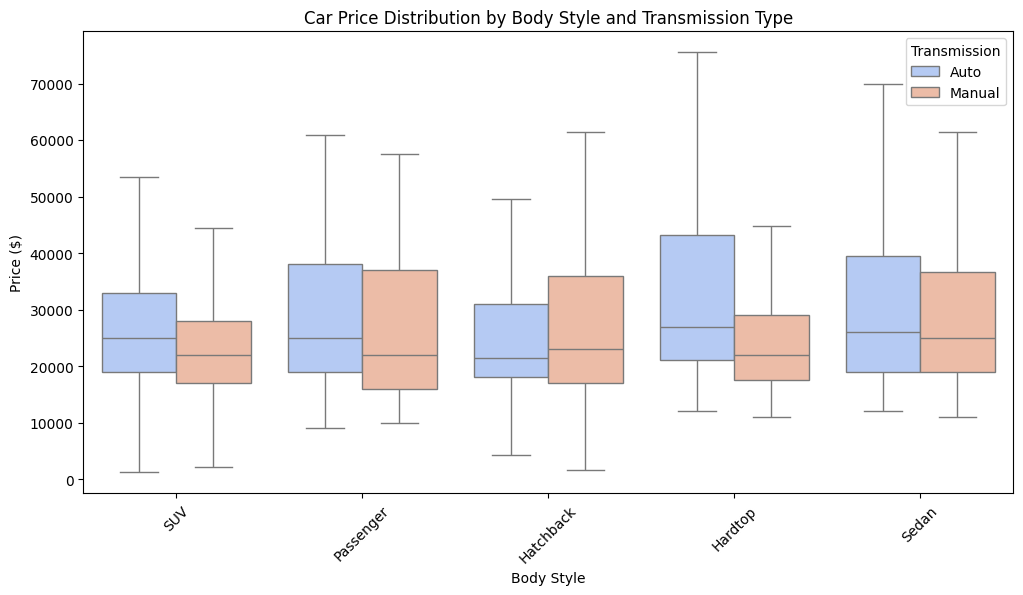

In [34]:
 # Car price distribution by body style and transmission type
plt.figure(figsize=(12,6))
sns.boxplot(data=car_df, x="Body Style", y="Price ($)", hue="Transmission", showfliers=False, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.legend(title="Transmission", bbox_to_anchor=(1,1))
plt.show()

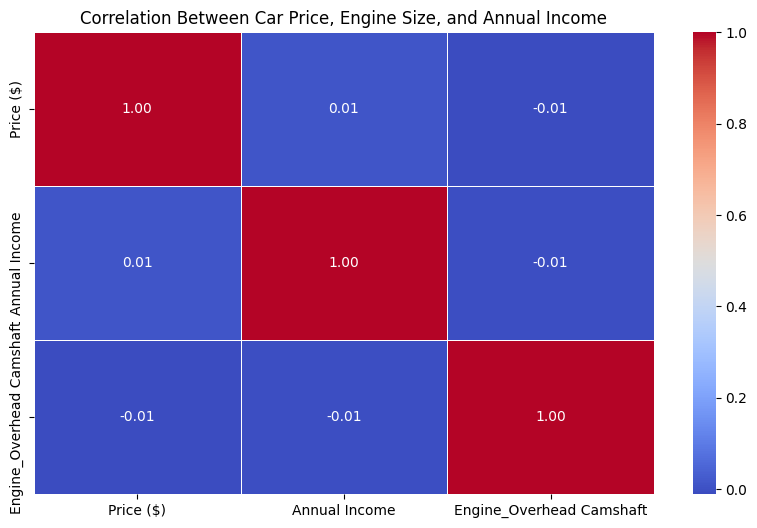

In [35]:
# Correlation between car price, engine size, and annual income
num_cols = ["Price ($)", "Annual Income"]
car_df_encoded = pd.get_dummies(car_df, columns=["Engine"], drop_first=True)  # One-hot encode engine types

correlation_matrix = car_df_encoded[num_cols + [col for col in car_df_encoded.columns if "Engine_" in col]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Car Price, Engine Size, and Annual Income")
plt.show()

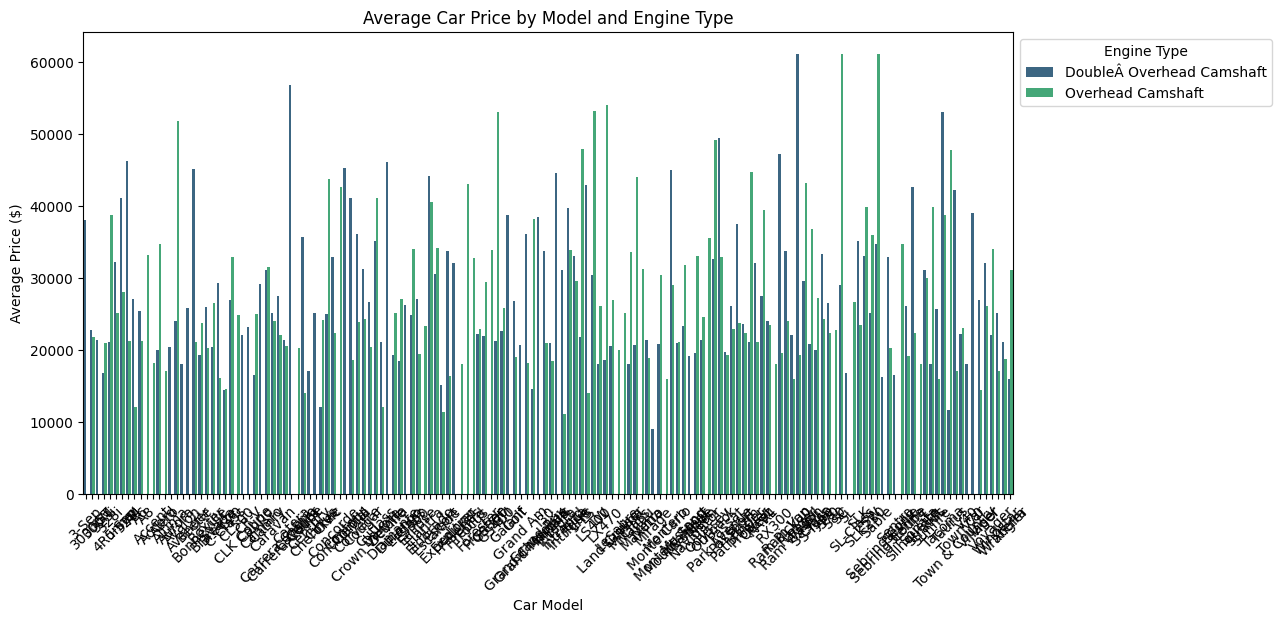

In [36]:
# Average car price by model and engine type
avg_price_model_engine = car_df.groupby(["Model", "Engine"])["Price ($)"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_price_model_engine, x="Model", y="Price ($)", hue="Engine", palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Car Model")
plt.ylabel("Average Price ($)")
plt.title("Average Car Price by Model and Engine Type")
plt.legend(title="Engine Type", bbox_to_anchor=(1,1))
plt.show()


In [37]:
# 3 rd dataset

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the cleaned dataset
file_path = "./amazon.csv"
amazon_df = pd.read_csv(file_path)

# Data Cleaning and Type Conversion
amazon_df['discounted_price'] = amazon_df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon_df['actual_price'] = amazon_df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon_df['discount_percentage'] = amazon_df['discount_percentage'].str.replace('%', '').astype(float)
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'], errors='coerce')
amazon_df['rating_count'] = amazon_df['rating_count'].str.replace(',', '').astype(float)

# Fill missing values in rating_count with median
amazon_df.loc[:, 'rating_count'] = amazon_df['rating_count'].fillna(amazon_df['rating_count'].median())

# Extract primary category (first category listed)
amazon_df['primary_category'] = amazon_df['category'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else x)


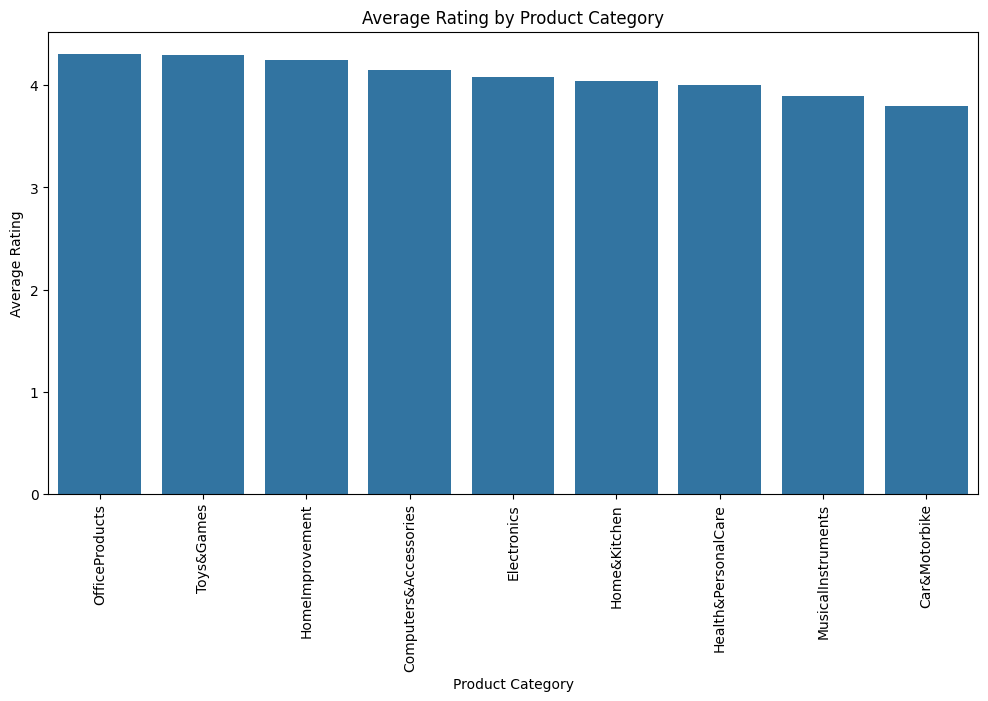

In [43]:
# Question 1: What is the average rating for each product category?
category_avg_rating = amazon_df.groupby('primary_category')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_avg_rating.index, y=category_avg_rating.values)
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Average Rating")
plt.title("Average Rating by Product Category")
plt.show()

In [45]:

# Question 2: What are the top rating_count products by category?
top_rated_products = amazon_df.groupby('primary_category').apply(lambda x: x.nlargest(1, 'rating_count'))[['product_name', 'rating_count']]
print(top_rated_products)

                                                                 product_name  \
primary_category                                                                
Car&Motorbike         1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories 588           SanDisk Cruzer Blade 32GB USB Flash Drive   
Electronics           12    AmazonBasics Flexible Premium HDMI Cable (Blac...   
Health&PersonalCare   1247  Dr Trust Electronic Kitchen Digital Scale Weig...   
Home&Kitchen          1028  Pigeon Polypropylene Mini Handy and Compact Ch...   
HomeImprovement       982   Gizga Essentials Cable Organiser, Cord Managem...   
MusicalInstruments    613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...   
OfficeProducts        659   Casio FX-82MS 2nd Gen Non-Programmable Scienti...   
Toys&Games            924   Faber-Castell Connector Pen Set - Pack of 25 (...   

                            rating_count  
primary_category                          
Car&Motorbike         

C:\Users\Sumit\AppData\Local\Temp\ipykernel_2676\1305008177.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rated_products = amazon_df.groupby('primary_category').apply(lambda x: x.nlargest(1, 'rating_count'))[['product_name', 'rating_count']]


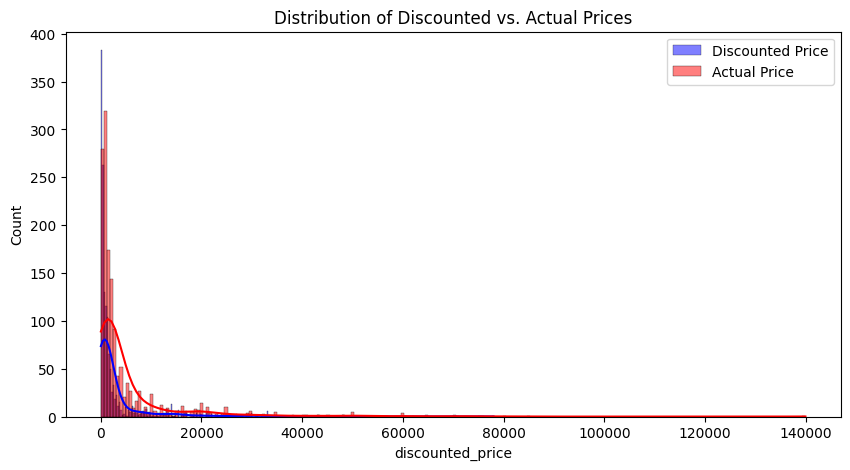

In [46]:
# Question 3: What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(10, 5))
sns.histplot(amazon_df['discounted_price'], color='blue', label='Discounted Price', kde=True)
sns.histplot(amazon_df['actual_price'], color='red', label='Actual Price', kde=True)
plt.legend()
plt.title("Distribution of Discounted vs. Actual Prices")
plt.show()

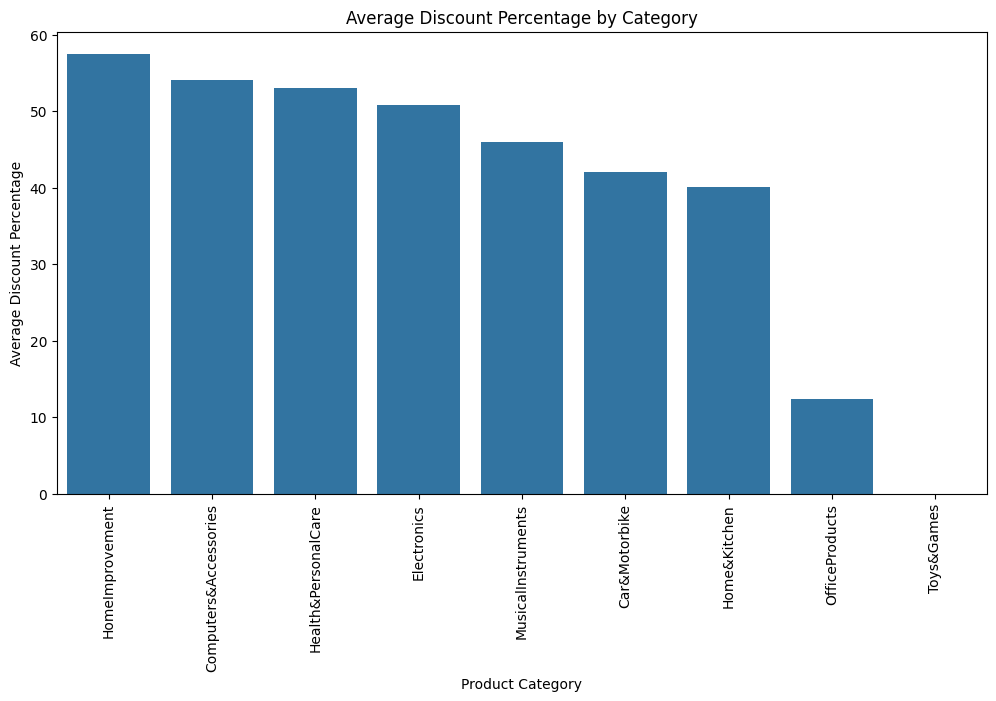

In [47]:
# Question 4: How does the average discount percentage vary across categories?
category_discount_avg = amazon_df.groupby('primary_category')['discount_percentage'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_discount_avg.index, y=category_discount_avg.values)
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Average Discount Percentage")
plt.title("Average Discount Percentage by Category")
plt.show()

In [48]:

# Question 5: What are the most popular product names (highest rating_count)?
top_products = amazon_df[['product_name', 'rating_count']].nlargest(10, 'rating_count')
print(top_products)

                                          product_name  rating_count
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...      313832.0


In [49]:
# Question 6: What are the most popular product keywords?
all_words = ' '.join(amazon_df['product_name'].dropna()).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)
print("Most Popular Product Keywords:", most_common_words)

Most Popular Product Keywords: [('with', 718), ('for', 614), ('|', 457), ('&', 432), ('USB', 342), ('and', 310), ('Cable', 306), ('-', 220), ('Charging', 212), ('Fast', 208)]


In [55]:
# Question 7: What are the most popular product reviews?
top_reviews = amazon_df.nlargest(10, 'rating_count')[['review_title', 'review_content']]
print(top_reviews)

                                          review_title  \
12   It's quite good and value for money,Works well...   
47   It's quite good and value for money,Works well...   
65   It's quite good and value for money,Works well...   
684  It's quite good and value for money,Works well...   
352  Best value for money,HEAD PHONE POUCH NOT RECE...   
400  Best value for money,HEAD PHONE POUCH NOT RECE...   
584  Best value for money,HEAD PHONE POUCH NOT RECE...   
370  Best phone for below normal use,Good mobile fo...   
371  Best phone for below normal use,Good mobile fo...   
473  Best phone for below normal use,Good mobile fo...   

                                        review_content  
12   I am using it for 14 days now. The experience ...  
47   I am using it for 14 days now. The experience ...  
65   I am using it for 14 days now. The experience ...  
684  I am using it for 14 days now. The experience ...  
352  The sound quality of this earphone are really ...  
400  The sound qual

In [52]:
# Question 8: What is the correlation between discounted_price and rating?
correlation = amazon_df[['discounted_price', 'rating']].corr()
print("Correlation between Discounted Price and Rating:\n", correlation)


Correlation between Discounted Price and Rating:
                   discounted_price    rating
discounted_price          1.000000  0.120337
rating                    0.120337  1.000000


In [53]:
# Question 9: What are the Top 5 categories based on the highest ratings?
top_5_categories = category_avg_rating.head(5)
print("Top 5 Categories by Highest Ratings:\n", top_5_categories)

Top 5 Categories by Highest Ratings:
 primary_category
OfficeProducts           4.309677
Toys&Games               4.300000
HomeImprovement          4.250000
Computers&Accessories    4.154967
Electronics              4.081749
Name: rating, dtype: float64


In [54]:
# Question 10: Identify potential areas for improvement or optimization
missing_values = amazon_df.isnull().sum()
discount_analysis = amazon_df[['actual_price', 'discounted_price', 'discount_percentage']].describe()
print("Potential Improvement Areas:")
print("- Missing Values:\n", missing_values)
print("- Discount Analysis:\n", discount_analysis)

Potential Improvement Areas:
- Missing Values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
primary_category       0
dtype: int64
- Discount Analysis:
         actual_price  discounted_price  discount_percentage
count    1465.000000       1465.000000          1465.000000
mean     5444.990635       3125.310874            47.691468
std     10874.826864       6944.304394            21.635905
min        39.000000         39.000000             0.000000
25%       800.000000        325.000000            32.000000
50%      1650.000000        799.000000            50.000000
75%      4295.000000       1999.000000            63.000000
max    13990

In [56]:
# 4th dataset

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "./spotify.csv"
df = pd.read_csv(file_path)

# Question 1: Read the dataframe, check for null values and duplicates
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

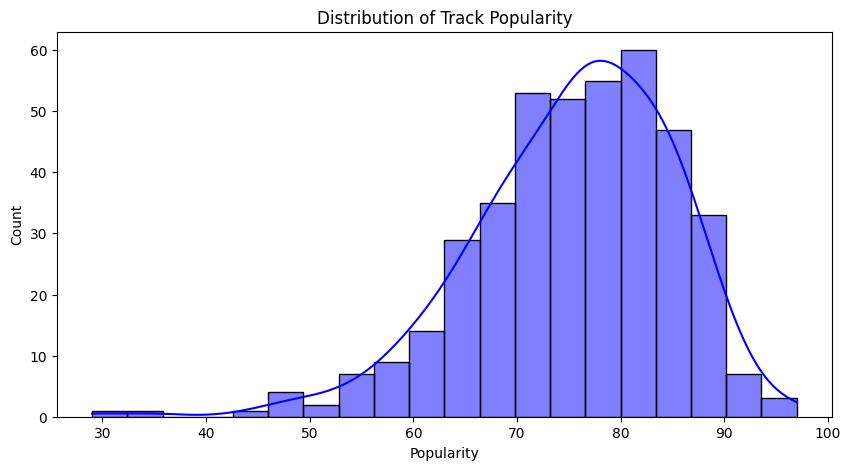

In [58]:
# Question 2: Distribution of popularity
plt.figure(figsize=(10, 5))
sns.histplot(df['Popularity'], bins=20, kde=True, color='blue')
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title("Distribution of Track Popularity")
plt.show()

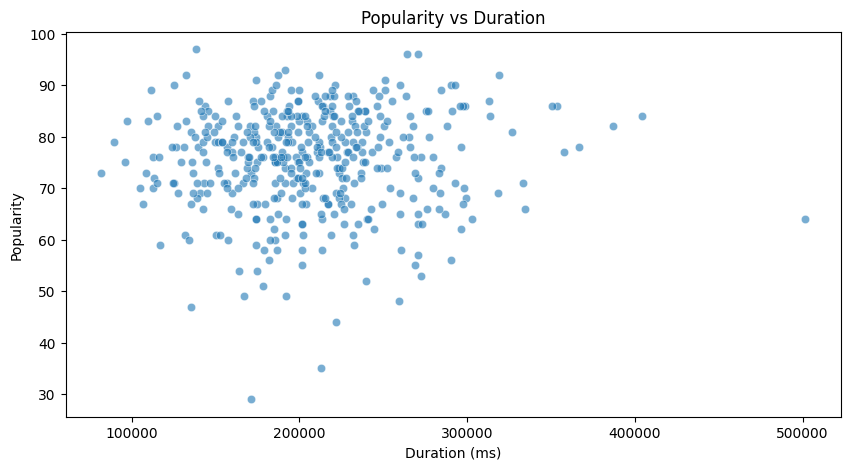

In [59]:
# Question 3: Relationship between popularity and duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Duration (ms)'], y=df['Popularity'], alpha=0.6)
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.title("Popularity vs Duration")
plt.show()


C:\Users\Sumit\AppData\Local\Temp\ipykernel_2676\1444405075.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')


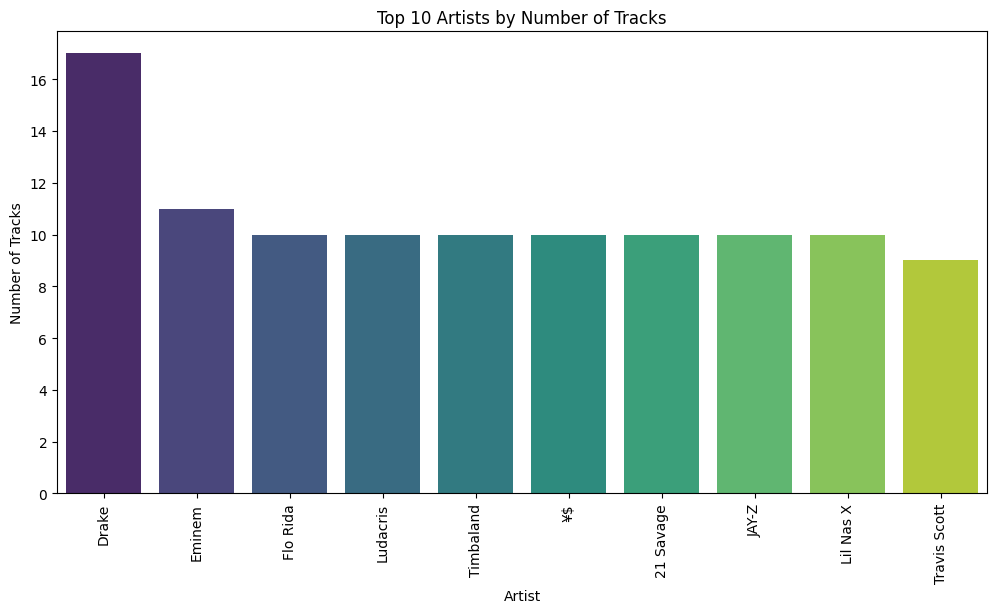

In [60]:

# Question 4: Artist with the highest number of tracks
plt.figure(figsize=(12, 6))
top_artists = df['Artist'].value_counts().head(10)
sns.barplot(x=top_artists.index, y=top_artists.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.title("Top 10 Artists by Number of Tracks")
plt.show()

In [61]:
# Question 5: Top 5 least popular tracks
least_popular_tracks = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)


Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [62]:
# Question 6: Artist with the highest average popularity
top_5_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5)
print("Top 5 Artists by Average Popularity:\n", top_5_artists)


Top 5 Artists by Average Popularity:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64


In [63]:
# Question 7: Most popular tracks of the top 5 artists
most_popular_tracks = df.loc[df.groupby('Artist')['Popularity'].idxmax()][['Artist', 'Track Name', 'Popularity']]
print("Most Popular Tracks for Top 5 Artists:\n", most_popular_tracks)


Most Popular Tracks for Top 5 Artists:
                      Artist  \
369                  *NSYNC   
345                2 Chainz   
70                21 Savage   
391  A Boogie Wit da Hoodie   
437               A$AP Ferg   
..                      ...   
156              Young Nudy   
174              Young Thug   
167            benny blanco   
140                   cassö   
260                      ¥$   

                                            Track Name  Popularity  
369                             Better Place (Reunion)          67  
345                         We Own It (Fast & Furious)          72  
70                                              redrum          96  
391                       Drowning (feat. Kodak Black)          80  
437  Work REMIX (feat. A$AP Rocky, French Montana, ...          69  
..                                                 ...         ...  
156      Peaches & Eggplants (feat. Latto & Sexyy Red)          67  
174         Hot (Remix) [feat. Gunn

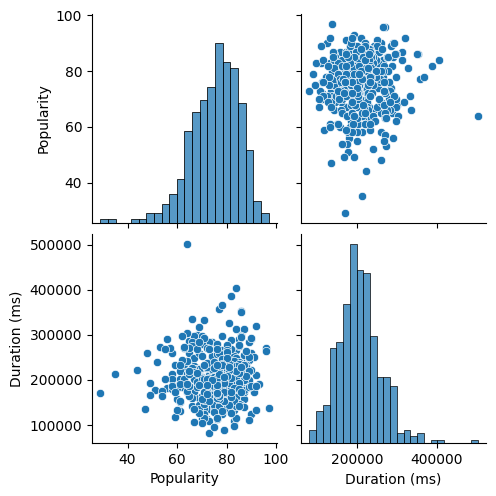

In [64]:
# Question 8: Pair plot of numerical variables
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()

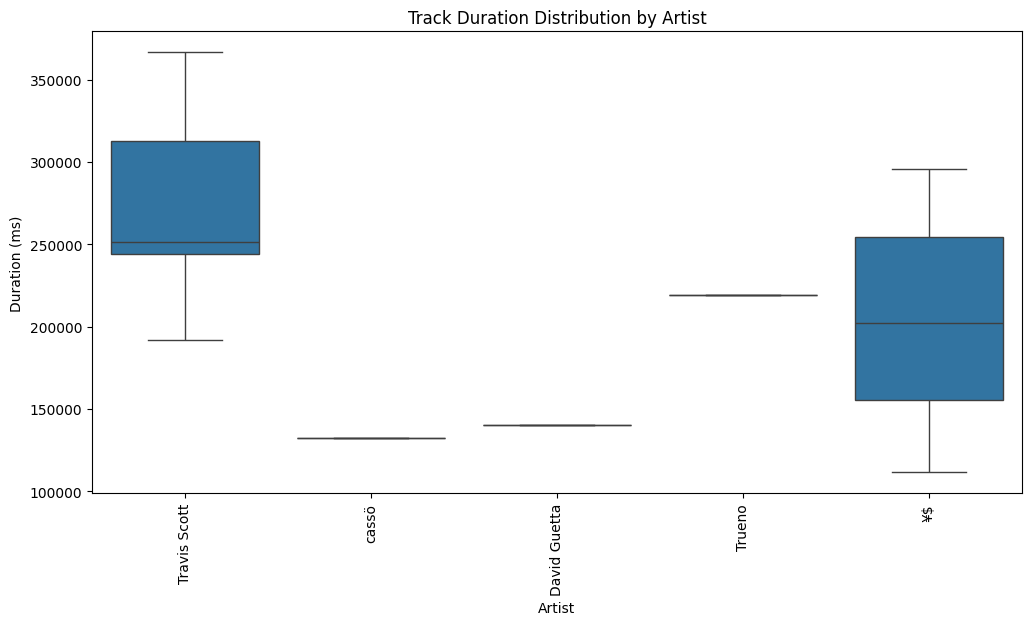

In [65]:
# Question 9: Variation of track duration across different artists
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(top_5_artists.index)])
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.title("Track Duration Distribution by Artist")
plt.show()

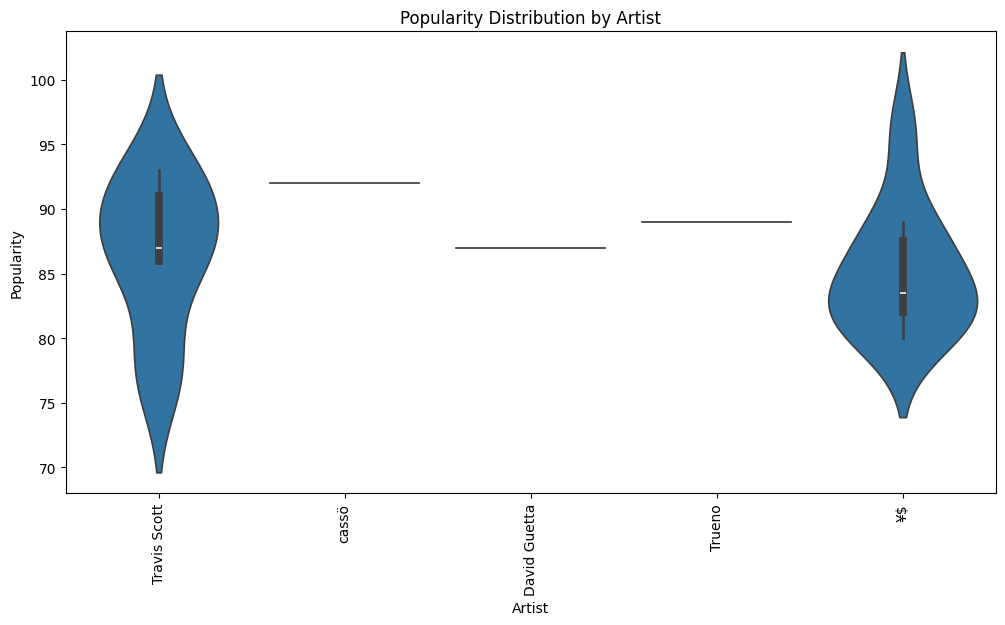

In [66]:
# Question 10: Distribution of popularity across artists
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(top_5_artists.index)])
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.title("Popularity Distribution by Artist")
plt.show()
